In [32]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

In [2]:
from memote import ReportConfiguration

In [3]:
from sklearn.decomposition import PCA

In [4]:
from sklearn.manifold import TSNE

In [5]:
from umap import UMAP

In [33]:
%matplotlib inline

## Extract

In [6]:
df = pd.concat([
    pd.read_csv("data/bigg/metrics.csv"),
    pd.read_csv("data/uminho/metrics.csv"),
#     pd.read_csv("data/mmodel/sbml/metrics.csv"),
    pd.read_csv("data/mmodel/sbml3/metrics.csv"),
], ignore_index=True)

In [7]:
df.shape

(31018, 6)

In [8]:
df.head()

,test,title,metric,numeric,model,collection
0,test_absolute_extreme_coefficient_ratio,Ratio Min/Max Non-Zero Coefficients,0.000000,NaN,RECON1,BiGG
1,test_biomass_presence,Biomass Reactions Identified,1.000000,0.0,RECON1,BiGG
2,test_biomass_specific_sbo_presence,Biomass Reactions SBO:0000629 Presence,1.000000,0.0,RECON1,BiGG
3,test_blocked_reactions,Universally Blocked Reactions,0.338412,1266.0,RECON1,BiGG
4,test_compartments_presence,Total Compartments,1.000000,8.0,RECON1,BiGG


## Transform

### Restrict to Scored Test Cases

In [9]:
config = ReportConfiguration.load()

In [10]:
scored = set()
for name, section in config["cards"]["scored"]["sections"].items():
    scored.update(section["cases"])

In [17]:
scored_df = df[df["test"].isin(scored)].copy()

In [18]:
scored_df.shape

(5040, 6)

### Pivot Table

In [19]:
scored_df.set_index(["collection", "model", "test"], inplace=True)

In [20]:
scored_df[scored_df.index.duplicated(keep=False)]

,,,title,metric,numeric
collection,model,test,,,


In [26]:
observations = scored_df.loc[:, ["metric"]].unstack()
observations.head()

metric  \
test                   test_biomass_specific_sbo_presence   
collection model                                            
BiGG       RECON1                                     1.0   
           Recon3D                                    0.0   
           STM_v1_0                                   0.0   
           e_coli_core                                0.0   
           iAB_RBC_283                                1.0   

                                                          \
test                   test_demand_specific_sbo_presence   
collection model                                           
BiGG       RECON1                                    0.0   
           Recon3D                                   0.0   
           STM_v1_0                                  0.0   
           e_coli_core                               1.0   
           iAB_RBC_283                               0.0   

                                                            \
test                   test_exchange_specific_sbo_presence   
collection model                                             
BiGG       RECON1                                      0.0   
           Recon3D                                     0.0   
           STM_v1_0                                    0.0   
           e_coli_core                                 0.0   
           iAB_RBC_283                                 0.0   

                                               \
test                   test_find_disconnected   
collection model                                
BiGG       RECON1                         0.0   
           Recon3D                        0.0   
           STM_v1_0                       0.0   
           e_coli_core                    0.0   
           iAB_RBC_283                    0.0   

                                                                             \
test                   test_find_reactions_unbounded_flux_default_condition   
collection model                                                              
BiGG       RECON1                                                0.817998     
           Recon3D                                               0.922097     
           STM_v1_0                                              0.086081     
           e_coli_core                                           0.020408     
           iAB_RBC_283                                           0.079646     

                                                              \
test                   test_gene_product_annotation_presence   
collection model                                               
BiGG       RECON1                                   0.013123   
           Recon3D                                  0.008452   
           STM_v1_0                                 0.015736   
           e_coli_core                              0.007299   
           iAB_RBC_283                              0.106322   

                                                                               \
test                   test_gene_sbo_presence test_gene_specific_sbo_presence   
collection model                                                                
BiGG       RECON1                         1.0                             1.0   
           Recon3D                        1.0                             1.0   
           STM_v1_0                       1.0                             1.0   
           e_coli_core                    1.0                             1.0   
           iAB_RBC_283                    1.0                             1.0   

                                                                      \
test                   test_metabolic_reaction_specific_sbo_presence   
collection model                                                       
BiGG       RECON1                                                1.0   
           Recon3D                                               1.0   
           STM_v1_0                 

## Dimension Reduction

### PCA

In [48]:
%%time
pca = PCA(n_components=2).fit_transform(observations)

CPU times: user 8.07 ms, sys: 0 ns, total: 8.07 ms
Wall time: 8.25 ms


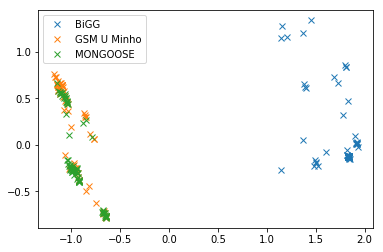

In [49]:
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    plt.plot(pca[mask, 0], pca[mask, 1], "x", label=label)
plt.legend()
plt.show()

### t-SNE

In [47]:
%%time
tsne = TSNE(n_components=2).fit_transform(observations)

CPU times: user 763 ms, sys: 286 µs, total: 763 ms
Wall time: 762 ms


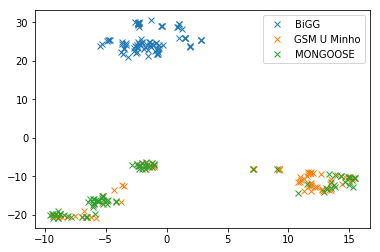

In [50]:
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    plt.plot(tsne[mask, 0], tsne[mask, 1], "x", label=label)
plt.legend()
plt.show()

### UMAP

In [51]:
%%time
umap = UMAP(n_components=2).fit_transform(observations)

/home/moritz/.virtualenvs/memote-meta/lib/python3.6/site-packages/umap/spectral.py:229 UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)


CPU times: user 5.15 s, sys: 366 ms, total: 5.51 s
Wall time: 5.01 s


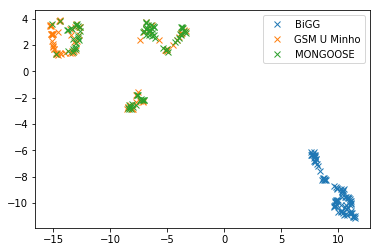

In [52]:
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    plt.plot(umap[mask, 0], umap[mask, 1], "x", label=label)
plt.legend()
plt.show()